In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [51]:
dfAge = pd.read_csv('Data2/By Age 2015 - 2020.csv', dtype={'No of Arrivals': 'int', 'Year': 'int'})
dfIncome = pd.read_csv('Data2/By Annual Income Group(2019-2020).csv', dtype={'No of Arrival per Annual Income': 'int', 'Year': 'int'})
dfFreq = pd.read_csv('Data2/By Frequency of purpose(2015- 2020).csv', dtype={'No of Arrival by Frequency of purpose': 'int', 'Year': 'int'})
dfTransport = pd.read_csv('Data2/By mode of transport(2015-2020).csv')
dfOccupation = pd.read_csv('Data2/By Occupation(2015-2020).csv')
dfSex = pd.read_csv('Data2/By Sex 2015 - 2020.csv')
dfQuart = pd.read_csv('Data2/TourismArrival2020-2021(Quarterly).csv')
dfList = [dfAge, dfIncome, dfFreq, dfTransport, dfOccupation, dfSex, dfQuart]
nameList = ['Age', 'Income', 'Freq', 'Transport', 'Occupation', 'Sex', 'Arrival']
# type(dfQuart)

## preprocess

In [52]:
for i, df in enumerate(dfList):
    # for temp in toChange:
    #     try:
    #         df[temp] = df[temp].str.replace(",", "")
    #         df[temp] = pd.to_numeric(df[temp], errors="coerce")
    #     except:
    #         continue
    dfList[i] = df
    missing_values = df.isna()
    missing_counts = df.isna().sum()
    total_missing = df.isna().sum().sum()
    print(f"total missing : {total_missing}")
    print(f"type : {df.dtypes}")
    print('-----------------------------')



total missing : 0
type : Unnamed: 0               int64
Region                  object
Country of Residence    object
Age Group               object
No of Arrivals           int32
Year                     int32
dtype: object
-----------------------------
total missing : 0
type : Country of Residence    object
Annual Income Group     object
No of Arrivals           int64
Year                     int32
dtype: object
-----------------------------
total missing : 0
type : Coountry of Residence    object
Frequency of visit       object
No of Arrivals            int64
Year                      int32
dtype: object
-----------------------------
total missing : 0
type : Country of Residence    object
Mode of Transport       object
Year                     int64
No of Arrivals           int64
dtype: object
-----------------------------
total missing : 0
type : Country of Residence    object
Year                     int64
No of Arrivals           int64
Occupation              object
dtype: object

In [53]:
# numecalize
contentsDict = {}
for i, df in enumerate(dfList):
    name = nameList[i]
    columns = df.columns.tolist()
    temp2 = {}
    for column in columns:
        if df[column].dtype != object:
            print(column)
            continue
        temp = df[column].unique()
        AnyToNum = {}
        NumToAny = {}
        for j, item in enumerate(temp, start=1):
            NumToAny[j] = item
            AnyToNum[item] = j
        def converter(item):
            return AnyToNum.get(item, np.nan)
        df[column] = df[column].apply(converter)
        
        temp2[column] = [NumToAny, AnyToNum]
    contentsDict[name] = temp2
    print(df)


Unnamed: 0
No of Arrivals
Year
      Unnamed: 0  Region  Country of Residence  Age Group  No of Arrivals  \
0              1       1                     1          1           17433   
1              2       1                     1          2            3736   
2              3       1                     1          3            4549   
3              4       1                     1          4            4028   
4              5       1                     1          5            2735   
...          ...     ...                   ...        ...             ...   
2263        2264      15                    54          3            4373   
2264        2265      15                    54          4            3785   
2265        2266      15                    54          5            2434   
2266        2267      15                    54          6            1580   
2267        2268      15                    54          7             996   

      Year  
0     2015  
1     2015  
2    

In [54]:
contentsDict

{'Age': {'Region': [{1: 'South-East Asia',
    2: 'North-East Asia',
    3: 'Asia',
    4: 'Western Europe',
    5: 'Nothern Europe',
    6: 'Europe',
    7: 'Southern/Medit. Europe',
    8: 'Northern Europe',
    9: 'Central/Eastern Europe',
    10: 'East Europe',
    11: 'America',
    12: 'South Asia',
    13: 'Oceania',
    14: 'Middle East',
    15: 'Africa'},
   {'South-East Asia': 1,
    'North-East Asia': 2,
    'Asia': 3,
    'Western Europe': 4,
    'Nothern Europe': 5,
    'Europe': 6,
    'Southern/Medit. Europe': 7,
    'Northern Europe': 8,
    'Central/Eastern Europe': 9,
    'East Europe': 10,
    'America': 11,
    'South Asia': 12,
    'Oceania': 13,
    'Middle East': 14,
    'Africa': 15}],
  'Country of Residence': [{1: 'Brunai',
    2: 'Cambodia',
    3: 'Indonesia',
    4: 'Laos',
    5: 'Malaysia',
    6: 'Myanmar',
    7: 'Philippines',
    8: 'Singapore',
    9: 'Vietnam',
    10: 'China',
    11: 'Hong Kong',
    12: 'Japan',
    13: 'Korea',
    14: 'Taiwan'

## (useless) EDA

In [55]:
import seaborn as sns

<Axes: >

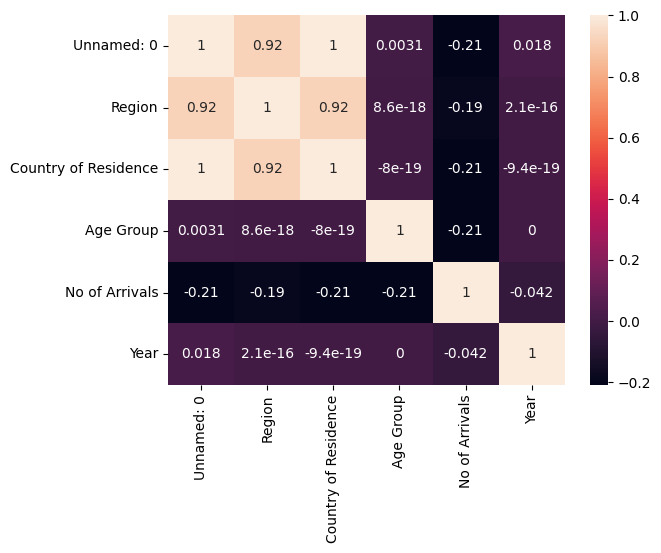

In [56]:
sns.heatmap(dfList[0].corr(), annot=True)

<Axes: >

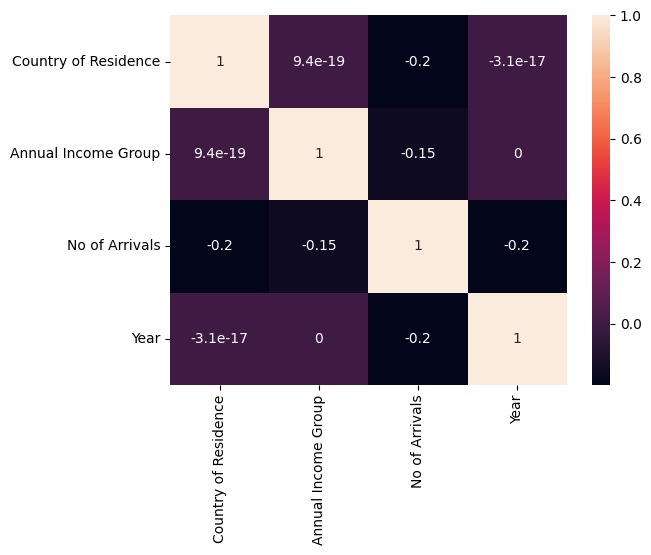

In [57]:
sns.heatmap(dfList[1].corr(), annot=True)

<Axes: >

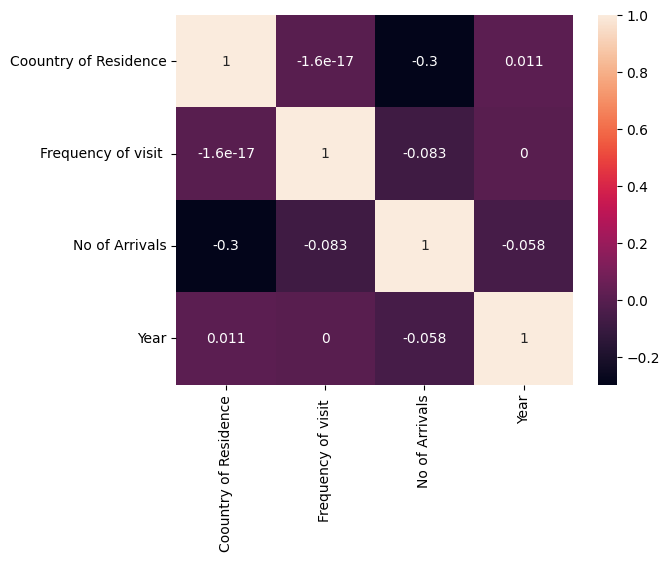

In [58]:
sns.heatmap(dfList[2].corr(), annot=True)

<Axes: >

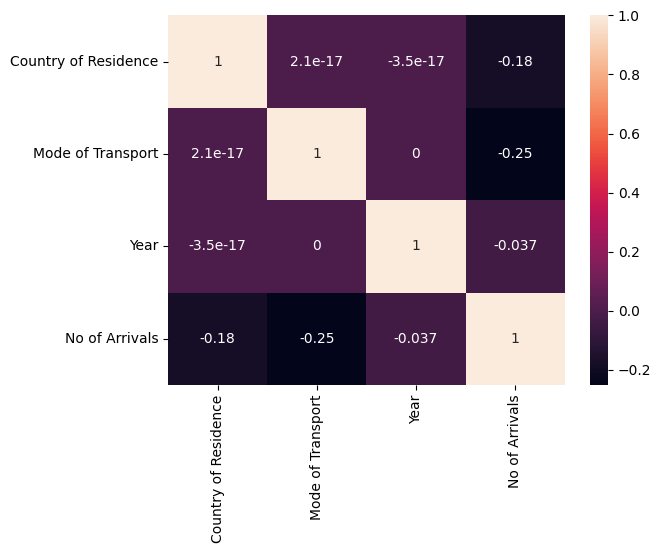

In [59]:
sns.heatmap(dfList[3].corr(), annot=True)

<Axes: >

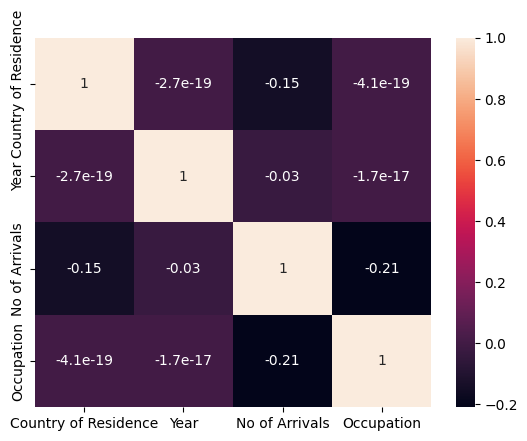

In [60]:
sns.heatmap(dfList[4].corr(), annot=True)

<Axes: >

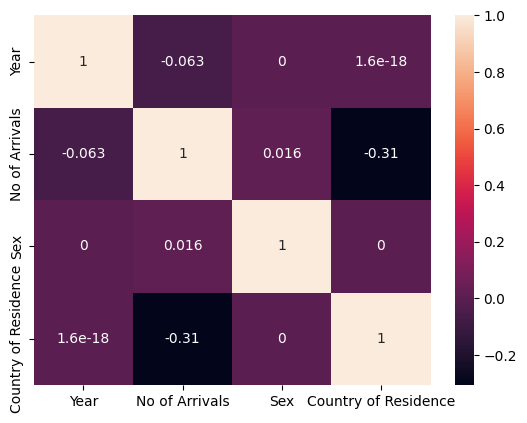

In [61]:
sns.heatmap(dfList[5].corr(), annot=True)

<Axes: >

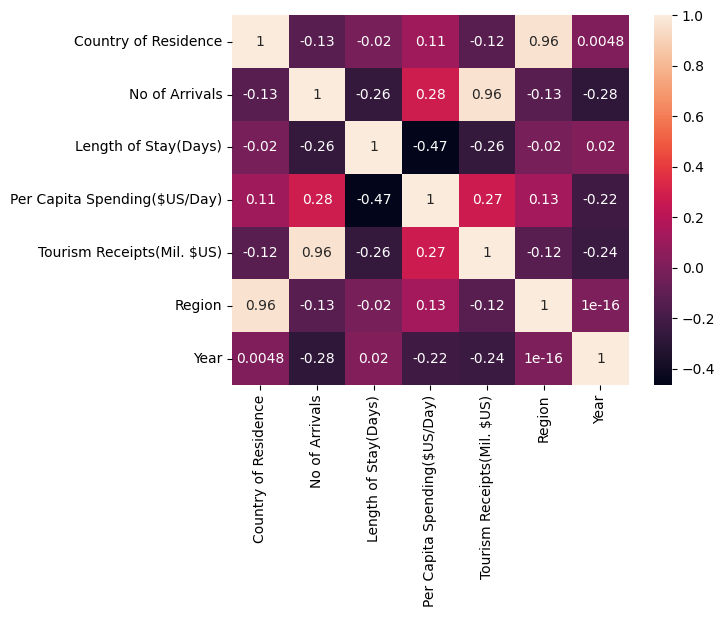

In [62]:
sns.heatmap(dfList[6].corr(), annot=True)

## Model

In [63]:

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = {
    'poly_features__degree': np.arange(2, 10)
}

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

testDf = {}
Models = {}

for i, df in enumerate(dfList):
    # split
    name = nameList[i]
    columns = df.columns.tolist()
    columns.remove('No of Arrivals')
    X = df[columns]
    y = df['No of Arrivals']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # test data preparation
    X_test_list = []
    y_test_list = y_test.tolist()
    print()
    for row in X_test.iterrows():
        item = []
        for j in range(len(columns)):
            item.append(row[1][j])
        X_test_list.append(item)
    data = [X_test_list, y_test_list]
    testDf[nameList[i]]=data

    # create model
    LRModel = LinearRegression()
    LRModel.fit(X, y)

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    poly = PolynomialFeatures(degree=grid_search.best_params_['poly_features__degree'])
    X_poly = poly.fit_transform(X)
    PRModel = LinearRegression()
    PRModel.fit(X_poly, y)
    data = [LRModel, PRModel, grid_search.best_params_['poly_features__degree']]
    print(data)
    Models[nameList[i]]=data
    



[LinearRegression(), LinearRegression(), 2]

[LinearRegression(), LinearRegression(), 2]

[LinearRegression(), LinearRegression(), 8]

[LinearRegression(), LinearRegression(), 2]

[LinearRegression(), LinearRegression(), 7]

[LinearRegression(), LinearRegression(), 2]

[LinearRegression(), LinearRegression(), 3]


In [64]:
testDf['Age'][1]

[6261,
 164801,
 1043,
 30640,
 749,
 72607,
 283,
 1047559,
 1682304,
 17863,
 77541,
 212841,
 40577,
 5379,
 17442,
 1220,
 28835,
 42896,
 22806,
 11279,
 279451,
 1163309,
 134875,
 67163,
 3946,
 3485,
 16727,
 15438,
 163121,
 24451,
 125580,
 163002,
 107187,
 13316,
 151953,
 40061,
 17091,
 15350,
 251118,
 53269,
 60746,
 140084,
 68426,
 725,
 48450,
 10433,
 689,
 15851,
 25943,
 44024,
 194081,
 12405,
 9704,
 8187,
 19214,
 1982819,
 10846,
 2913,
 163406,
 78857,
 48311,
 142786,
 78985,
 7861,
 44414,
 1787185,
 2840,
 23269,
 56834,
 545560,
 105548,
 28220,
 2026,
 35964,
 3155199,
 173824,
 99670,
 107695,
 17138,
 896591,
 8948,
 781674,
 74344,
 132792,
 2547,
 272551,
 3948,
 3179,
 217111,
 191666,
 292553,
 4008,
 162209,
 70911,
 2444,
 174385,
 17661,
 7765,
 111565,
 4841,
 9968,
 3959,
 825496,
 61531,
 138024,
 21675,
 28354,
 14950,
 2668,
 33310,
 1267,
 24152,
 15995,
 1039395,
 147204,
 15167,
 837318,
 23295,
 106726,
 341098,
 648382,
 1006939,
 3407

In [65]:
Models

{'Age': [LinearRegression(), LinearRegression(), 2],
 'Income': [LinearRegression(), LinearRegression(), 2],
 'Freq': [LinearRegression(), LinearRegression(), 8],
 'Transport': [LinearRegression(), LinearRegression(), 2],
 'Occupation': [LinearRegression(), LinearRegression(), 7],
 'Sex': [LinearRegression(), LinearRegression(), 2],
 'Arrival': [LinearRegression(), LinearRegression(), 3]}

## Evaluation

In [66]:
# test data preparation
# testVals = {}
# ansVals = {}
# for testData in testDf.values():
#     # for row in testData[0].iterrows():
#     #     # print(row)
#     #     for items in 
#     print(testData[0])
#     temp = []
#     for i in range(len(testData[0])):
#         row_list = testData[0].loc[i, :].values.flatten().tolist()
#         temp.append(row_list)
#     print(row_list)
#     ansVal = testData[1].tolist()
    


# print(ansVal)

y_test_list = y_test.tolist()
print(y_test_list)

[218, 14037, 4701, 4830, 32, 50, 2048, 847, 55384, 1319, 912, 2155, 13667, 982, 2272, 1747, 929, 64, 981, 4141, 693, 2079, 6840, 68005, 23464, 1484, 135, 25052, 13651, 707, 322, 278, 169, 195, 1087, 391, 18110, 143, 1206, 13953, 6946, 368, 376, 258, 2156, 16732, 97, 798, 87, 26347, 8111, 31, 321, 95, 479, 306, 22892, 5702, 844, 1734, 264, 837, 37, 11564, 654, 311415, 213448, 1693, 75, 48, 15442, 1070, 9444, 488, 8438, 2255, 292, 3255, 5679, 264134, 165, 152, 206529, 47, 182]


In [67]:

result = {}
for i, name in enumerate(nameList):

    LRModel = Models[name][0]
    PRModel = Models[name][1]
    LRPreds = []
    PRPreds = []
    testVals = testDf[name][0]
    ansVal = testDf[name][1]

    poly = PolynomialFeatures(degree=Models[name][2])

    for i, testVal in enumerate(testVals):
        
        x_pred_LR = np.array([testVal])
        # x_pred_LR = LRModel.predict(testVal2)
        LRPreds.append(LRModel.predict(x_pred_LR))
        
        x_pred_PR = np.array([testVal])
        x_pred_PR = poly.fit_transform(x_pred_PR)
        
        # x_pred_PR = PRModel.fit_transform(x_pred_PR)
        PRPreds.append(PRModel.predict(x_pred_PR))

        # mse = mean_squared_error(testData[1], testPred)

    print(len(ansVal))
    print(len(LRPreds))
    print(len(PRPreds))
    LR_r2 = r2_score(ansVal, LRPreds)
    PR_r2 = r2_score(ansVal, PRPreds)
    # print(i)
    # print(LR_r2)
    # print(PR_r2)
    result[name] = [LR_r2, PR_r2]


454
454
454
87
87
87
195
195
195


195
195
195


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: 

778
778
778
130
130
130
85
85
85


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: 

In [68]:
result

{'Age': [0.09218056537511843, 0.15762015237284654],
 'Income': [0.1333733382107497, 0.230320969737133],
 'Freq': [0.08861640484610755, 0.25123843264879164],
 'Transport': [0.0842538701815091, 0.11949118599487618],
 'Occupation': [0.07243507340498623, 0.3207307992174401],
 'Sex': [0.08407563387280492, 0.14033076742608908],
 'Arrival': [0.9181349228316896, 0.9910106002326232]}